Hola!

Mi nombre es Matias y voy a estar revisando tu proyecto.

En la primer revision, de encontrar errores voy a estar marcandotelos para que puedas corregirlos por tu cuenta. Lo mas parecido a una situacion real de trabajo como DA. De haber posteriores revisiones

Encontraras mis comentarios debajo - **por favor no los muevas, modifiques o elimines**.

Encontraras mis comentarios en verde, amarillo o rojo de esta manera:

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Genial, buen trabajo.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Cuidado, se recomienda...
</div>

<div class="alert alert-block alert-danger">

<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Necesita correcion. El trabajo no puede ser aceptado si precisa correcion.
</div>

Puedes responder a mis comentarios utilizando un mensaje de este tipo:

<div class="alert alert-block alert-info">
<b>Respuesta de estudiante.</b> <a class="tocSkip"></a>
</div>

## Introducción

**Descripción del proyecto**

Los clientes de Beta Bank se están yendo, cada mes, poco a poco. Los banqueros descubrieron que es más barato salvar a los clientes existentes que atraer nuevos.

Necesitamos predecir si un cliente dejará el banco pronto. Tú tienes los datos sobre el comportamiento pasado de los clientes y la terminación de contratos con el banco.

Crea un modelo con el máximo valor F1 posible. Para aprobar la revisión, necesitas un valor F1 de al menos 0.59. Verifica F1 para el conjunto de prueba.

Además, debes medir la métrica AUC-ROC y compararla con el valor F1.

**Instrucciones del proyecto**
1. Descarga y prepara los datos. Explica el procedimiento.
2. Examina el equilibrio de clases. Entrena el modelo sin tener en cuenta el desequilibrio. Describe brevemente tus hallazgos.
3. Mejora la calidad del modelo. Asegúrate de utilizar al menos dos enfoques para corregir el desequilibrio de clases. Utiliza conjuntos de entrenamiento y validación para encontrar el mejor modelo y el mejor conjunto de parámetros. Entrena diferentes modelos en los conjuntos de entrenamiento y validación. Encuentra el mejor. Describe brevemente tus hallazgos.
4. Realiza la prueba final.

**Descripción de los datos**

***Características***
* **RowNumber:** índice de cadena de datos
* **CustomerId:** identificador de cliente único
* **Surname:** apellido
* **CreditScore:** valor de crédito
* **Geography**: país de residencia
* **Gender:** sexo
* **Age:** edad
* **Tenure:** período durante el cual ha madurado el depósito a plazo fijo de un cliente (años)
* **Balance:** saldo de la cuenta
* **NumOfProducts:** número de productos bancarios utilizados por el cliente
* **HasCrCard:** el cliente tiene una tarjeta de crédito (1 - sí; 0 - no)
* **IsActiveMember:** actividad del cliente (1 - sí; 0 - no)
* **EstimatedSalary:** salario estimado

***Objetivo***
* **Exited:** El cliente se ha ido (1 - sí; 0 - no)

**Evaluación del proyecto**  

Hemos definido los criterios de evaluación para el proyecto. Lee esto con atención antes de pasar al ejercicio.
Esto es lo que los revisores buscarán cuando evalúen tu proyecto:
* ¿Cómo preparaste los datos para el entrenamiento? ¿Procesaste todos los tipos de características?
* ¿Explicaste los pasos de preprocesamiento lo suficientemente bien?
* ¿Cómo investigaste el equilibrio de clases?
* ¿Estudiaste el modelo sin tener en cuenta el desequilibrio de clases?
* ¿Qué descubriste sobre la investigación del ejercicio?
* ¿Dividiste correctamente los datos en conjuntos?
* ¿Cómo trabajaste con el desequilibrio de clases?
* ¿Utilizaste al menos dos técnicas para corregir el desequilibrio?
* ¿Realizaste correctamente el entrenamiento, la validación y las pruebas finales del modelo?
* ¿Qué tan alto es tu valor F1?
* ¿Examinaste los valores AUC-ROC?
* ¿Mantuviste la estructura del proyecto y el código limpio?

Ya tienes las hojas informativas y los resúmenes de capítulos, tienes todo para continuar con el proyecto.  

**¡Buena suerte!**

##  Exploracion de datos

### Librerias a utilizar

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Carga de datos

In [2]:
df = pd.read_csv('/datasets/Churn.csv')

In [3]:
def displaydata(data):
    print('Informacion de los datos y tu tipo')
    data.info()
    print()
    print('Muestra de datos')
    display(data.head(10))
    print()
    print('Valores ausentes')
    print(data.isna().sum())
    print()
    print('Descripcion de los datos')
    print(data.describe())
    print()
    print('Valores duplicados')
    print(data.duplicated().sum())

### Analisis de datos

In [4]:
displaydata(df)

Informacion de los datos y tu tipo
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB

Muestra de datos


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0



Valores ausentes
RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

Descripcion de los datos
         RowNumber    CustomerId   CreditScore           Age       Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  9091.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800     4.997690   
std     2886.89568  7.193619e+04     96.653299     10.487806     2.894723   
min        1.00000  1.556570e+07    350.000000     18.000000     0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000     2.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000     5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000     7.000000   
max  

Despues de este analisis superficial vemos que:

* Los tipos de datos estan correctos  
* No tenemos valores duplicados  
* Tenemos  valores ausentes en la columna de *Tenure* y de acuerdo a los datos la mediana y el promedio de esta categoria es practicamente nula, asi que podriamos valorar en llenar los valores ausentes con la mediana, ya que realizaremos un modelo de predicción, por lo tanto vamos a requerir la mayor cantidad de datos disponibles por lo que eliminar filas no seria lo mas adecuado en este momento.

Antes de continuar a rellenar los datos, veremos la relacion de la columna "target" en este caso "Exited"

0    0.7963
1    0.2037
Name: Exited, dtype: float64


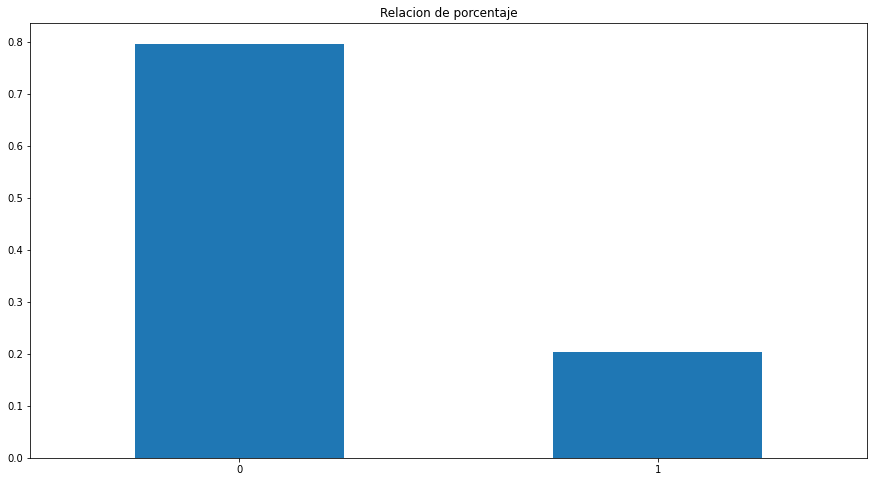

In [5]:
# Veamos el peso de cada clase
class_weight = df['Exited'].value_counts(normalize=True)
print(class_weight)
class_weight.plot(kind='bar',
                 rot=0,
                 figsize=(15,8))
plt.title('Relacion de porcentaje')
plt.show()

Como podemos observar, tenemos una relacion 4:1 en cuestion de equilibrio de clase, es decir, tenemos un 80% de datos con objetivo "0" y un 20% de datos con objetivo "1", podemos hacer un equilibrio de clases y balancear el conjunto de datos, probemos las dos formas para ver que resultados obtenemos.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Genial, buen comienzo describiendo los datos del dataset y el desequilibrio que presenta la variable objetivo.
</div>

## Division de datos

### Librerias a utilizar

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve

Algo que tenemos que tener en cuenta al momento de separar los datos y hacer los procesamientos necesarios es que tenemos datos que no son relevantes en la informacion que tenemos, estas columnas son: ***RowNumber, CustomerId, Surname***, ya que son variables que no aportarian un dato relevante al modelo, por los que las eliminaremos de un inicio.

In [7]:
df_train, df_rest = train_test_split(df, test_size = 0.40, random_state = 1992)
df_valid, df_test = train_test_split(df_rest, test_size = 0.50, random_state = 1992)

In [8]:
# Desisnamos los conjuntos features
columns_delete = ['RowNumber', 'CustomerId', 'Surname', 'Exited']
def df_features(data):
    features = data.drop(columns_delete, axis = 1)
    return features

In [9]:
# Eliminamos las columnas en los dataframes de train, valid y fix
features_train = df_features(df_train)
features_valid = df_features(df_valid)
features_test = df_features(df_test)

In [10]:
# Comprobamos el tamaño de los conjuntos features
features_train.shape, features_valid.shape, features_test.shape

((6000, 10), (2000, 10), (2000, 10))

In [11]:
# Designamos las columnas objetivo
def df_target(data,column):
    target = data[column]
    return target

In [12]:
target_train = df_target(df_train,'Exited')
target_valid = df_target(df_valid,'Exited')
target_test = df_target(df_test,'Exited')

In [13]:
# Comprobamos el tamaño de los conjuntos objetivo
target_train.shape, target_valid.shape, target_test.shape

((6000,), (2000,), (2000,))

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Genial, buen split del dataset
</div>

In [14]:
# Revisamos las variables vategoricas para saber cuantas valores posibles puede haber
print(features_train['Geography'].value_counts())
print(features_train['Gender'].value_counts())

France     2994
Germany    1527
Spain      1479
Name: Geography, dtype: int64
Male      3288
Female    2712
Name: Gender, dtype: int64


Convertiremos estas dos columnas a la codificacion One-Hot-Encoder

In [15]:
# Establecemos nuestra codificacion OHE
ohe = OneHotEncoder(sparse = False, drop='if_binary')
# Ajustamos los datos
columns_hot = ['Geography','Gender'] # columnas a convertir
ohe.fit(features_train[columns_hot]) 
# Establecemos una funcion para convertir los datos de diferentes conjuntos
def one_hot(data,cod): # dataframe y codificación
    ohe_features = pd.DataFrame(cod.transform(data[columns_hot]), columns = cod.get_feature_names())
    return ohe_features

In [16]:
cod_ohe_train = one_hot(features_train,ohe)
cod_ohe_valid = one_hot(features_valid,ohe)
cod_ohe_test = one_hot(features_test,ohe)

In [17]:
# Verificamos los datos
cod_ohe_train

,x0_France,x0_Germany,x0_Spain,x1_Male
0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,1.0
2,1.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,1.0
...,...,...,...,...
5995,1.0,0.0,0.0,0.0
5996,0.0,1.0,0.0,0.0
5997,1.0,0.0,0.0,0.0
5998,0.0,0.0,1.0,0.0


<div class="alert alert-block alert-info">
<b>Respuesta de estudiante.</b> <a class="tocSkip"></a>  

Corregido, se realizo "drop = "if_binary"
</div>

<div class="alert alert-block alert-danger">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Al setear el parametro drop en 'first' estamos perdiendo la categoria de geog Francia, lo cual no sera bueno para el entrenamiento
    
En la columna gender, al estar cargado los datos de forma binaria, no estaria mal quedarnos con una sola columna. Para eso podes setear drop en ‘if_binary’ que va a dejar 3 columnas para geography pero solo una para gender
    
O directamente no setear el parametro drop ya que el default es 'None' y ahi tendremos 3 para geo y 2 para gender
</div>

In [18]:
features_train

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
7921,588,Spain,Female,35,NaN,0.00,2,1,1,108739.15
4802,512,Spain,Male,39,3.0,0.00,1,1,0,134878.19
7939,720,France,Male,26,10.0,51962.91,2,1,0,45507.24
7025,569,Spain,Female,51,3.0,0.00,3,1,0,75084.96
8569,622,Spain,Male,36,NaN,0.00,2,1,1,104852.60
...,...,...,...,...,...,...,...,...,...,...
1320,687,France,Female,47,7.0,0.00,2,1,1,177624.01
229,594,Germany,Female,29,3.0,130830.22,1,1,0,61048.53
2216,686,France,Female,47,5.0,113328.93,1,1,0,124170.90
4093,764,Spain,Female,48,1.0,75990.97,1,1,0,158323.81


In [19]:
# Verificamos el tamaño de nuestro conjuntos
cod_ohe_train.shape, cod_ohe_valid.shape, cod_ohe_test.shape

((6000, 4), (2000, 4), (2000, 4))

Ya tenemos nuestros datos en codificacion OHE, ahora concatenaremos estos datos con su respectivo conjunto

In [20]:
def concat_ohe(data_ohe, data_original):
    concat_ohe = pd.concat([data_original.drop(columns = columns_hot).reset_index(drop=True),data_ohe],axis = 1)
    return concat_ohe

In [21]:
concat_train = concat_ohe(cod_ohe_train, features_train)
concat_valid = concat_ohe(cod_ohe_valid, features_valid)
concat_test = concat_ohe(cod_ohe_test, features_test)

In [22]:
# Verificamos el tamaño de nuestros conjuntos
concat_train.shape, concat_valid.shape, concat_test.shape

((6000, 12), (2000, 12), (2000, 12))

Ya tenemos nuestros conjuntos convertidos a OHE con sus datos totales, el proximo paso es agregar los valores ausentes, como bien dijimos, con la mediana, ya que es muy poca la variacion con la media.

In [23]:
# Establecemos nuestro imputer
simp = SimpleImputer(strategy = 'median')
# Ajustamos los datos
simp.fit(concat_train) 
# Establecemos una funcion para convertir los datos de diferentes conjuntos
def simp_imp(data,sim): # dataframe y codificación
    impute = pd.DataFrame(sim.transform(data), columns = data.columns)
    return impute

In [24]:
imp_train = simp_imp(concat_train, simp)
imp_valid = simp_imp(concat_valid, simp)
imp_test = simp_imp(concat_test, simp)

In [25]:
# Verificamos el tamaño de nuestros conjuntos
imp_train.shape, imp_valid.shape, imp_test.shape

((6000, 12), (2000, 12), (2000, 12))

In [26]:
# Verificamos que ya no tengamos valores ausentes
print(imp_train.isna().sum().sum(), imp_valid.isna().sum().sum(),imp_test.isna().sum().sum())

0 0 0


In [27]:
# Verificamos que los datos ausentes se hayan llenado correctamente
display(imp_train.describe())
display(imp_valid.describe())
display(imp_test.describe())

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,x0_France,x0_Germany,x0_Spain,x1_Male
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,650.804500,38.936000,4.976500,76705.140400,1.533167,0.707000,0.512667,99836.348872,0.499000,0.254500,0.246500,0.548000
std,96.157595,10.513499,2.763974,62355.601921,0.574707,0.455176,0.499881,57598.190281,0.500041,0.435616,0.431009,0.497732
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000,0.000000,0.000000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50488.107500,0.000000,0.000000,0.000000,0.000000
50%,652.000000,37.000000,5.000000,97277.130000,1.000000,1.000000,1.000000,99296.510000,0.000000,0.000000,0.000000,1.000000
75%,717.000000,44.000000,7.000000,127819.872500,2.000000,1.000000,1.000000,148631.052500,1.000000,1.000000,0.000000,1.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000,1.000000,1.000000,1.000000


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,x0_France,x0_Germany,x0_Spain,x1_Male
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,647.975000,38.835000,5.046500,75332.91047,1.531500,0.706000,0.517500,101148.459175,0.502000,0.241000,0.257000,0.546500
std,97.690143,10.461429,2.775462,62294.54257,0.595134,0.455706,0.499819,57265.765251,0.500121,0.427797,0.437089,0.497958
min,373.000000,18.000000,0.000000,0.00000,1.000000,0.000000,0.000000,178.190000,0.000000,0.000000,0.000000,0.000000
25%,580.000000,32.000000,3.000000,0.00000,1.000000,0.000000,0.000000,53084.107500,0.000000,0.000000,0.000000,0.000000
50%,651.000000,37.000000,5.000000,96371.98000,1.000000,1.000000,1.000000,101387.415000,1.000000,0.000000,0.000000,1.000000
75%,714.000000,44.000000,7.000000,126872.83000,2.000000,1.000000,1.000000,151355.945000,1.000000,0.000000,1.000000,1.000000
max,850.000000,88.000000,10.000000,238387.56000,4.000000,1.000000,1.000000,199841.320000,1.000000,1.000000,1.000000,1.000000


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,x0_France,x0_Germany,x0_Spain,x1_Male
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,652.255500,38.966000,5.01350,76981.114770,1.520000,0.700500,0.520000,99793.693615,0.508000,0.250000,0.242000,0.538000
std,97.091676,10.441617,2.73314,62642.545393,0.588875,0.458154,0.499725,57507.900681,0.500061,0.433121,0.428401,0.498679
min,350.000000,18.000000,0.00000,0.000000,1.000000,0.000000,0.000000,90.070000,0.000000,0.000000,0.000000,0.000000
25%,585.000000,32.000000,3.00000,0.000000,1.000000,0.000000,0.000000,50623.310000,0.000000,0.000000,0.000000,0.000000
50%,652.000000,37.000000,5.00000,97697.805000,1.000000,1.000000,1.000000,100968.295000,1.000000,0.000000,0.000000,1.000000
75%,721.000000,45.000000,7.00000,127556.470000,2.000000,1.000000,1.000000,148902.897500,1.000000,0.250000,0.000000,1.000000
max,850.000000,78.000000,10.00000,221532.800000,4.000000,1.000000,1.000000,199857.470000,1.000000,1.000000,1.000000,1.000000


Observamos que nuestros conjuntos contienen los datos correspondientes(6000,2000,2000), ya no tenemos valores ausentes ya que los corregimos con la mediana de la muestra con SimpleImputer, y al hacer mostrar las descripciones del modelo, vemos que la mediana es 5 como dijimos y el promedio ronda en el valor 5 con variaciones de decimales por el impute de la mediana en esta columna, por lo que nos queda por hacer un escalado de datos para estandarizarlos.

In [28]:
imp_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,x0_France,x0_Germany,x0_Spain,x1_Male
0,588.0,35.0,5.0,0.00,2.0,1.0,1.0,108739.15,0.0,0.0,1.0,0.0
1,512.0,39.0,3.0,0.00,1.0,1.0,0.0,134878.19,0.0,0.0,1.0,1.0
2,720.0,26.0,10.0,51962.91,2.0,1.0,0.0,45507.24,1.0,0.0,0.0,1.0
3,569.0,51.0,3.0,0.00,3.0,1.0,0.0,75084.96,0.0,0.0,1.0,0.0
4,622.0,36.0,5.0,0.00,2.0,1.0,1.0,104852.60,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5995,687.0,47.0,7.0,0.00,2.0,1.0,1.0,177624.01,1.0,0.0,0.0,0.0
5996,594.0,29.0,3.0,130830.22,1.0,1.0,0.0,61048.53,0.0,1.0,0.0,0.0
5997,686.0,47.0,5.0,113328.93,1.0,1.0,0.0,124170.90,1.0,0.0,0.0,0.0
5998,764.0,48.0,1.0,75990.97,1.0,1.0,0.0,158323.81,0.0,0.0,1.0,0.0


In [29]:
imp_train.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'x0_France', 'x0_Germany',
       'x0_Spain', 'x1_Male'],
      dtype='object')

In [30]:
# Creamos nuestro scaler
sc = StandardScaler()

# Especificamos las columnas
sc_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

# Ajustamos los datos
sc.fit(imp_train[sc_columns])

# Trasnformamos los datos
imp_train[sc_columns] = sc.transform(imp_train[sc_columns])
imp_valid[sc_columns] = sc.transform(imp_valid[sc_columns])
imp_test[sc_columns] = sc.transform(imp_test[sc_columns])

In [31]:
feat_train = imp_train
feat_valid = imp_valid
feat_test = imp_test

In [32]:
feat_train.shape, feat_valid.shape, feat_test.shape

((6000, 12), (2000, 12), (2000, 12))

Ya tenemos nuestros datos adaptados y listos para entrenar un modelo y obtener nuestras predicciones y puntajes.

Hay que destacar que estos conjuntos de datos estan transformados con las muestras "originales", y como bien dijimos haramos una prueba con los datos sin sobremuestreos o submuestreos y posteriormente evaluaremos realizar estas conversiones, sera mas facil, ya que los datos ya estan listos para hacer los muestreos correspondientes.

<div class="alert alert-block alert-info">
<b>Respuesta de estudiante.</b> <a class="tocSkip"></a>  

Corregido, se realizo la "StandartScale" solo a las columnas numericas, se descartaron las columnas "HasCrCard,	IsActiveMember" ya que los datos contenidos son de "0" y "1"
</div>

<div class="alert alert-block alert-danger">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Cuando usas el scaling, debes especificarle a que columnas del dataset aplicarselo. La idea es aplicarlo solo a las numericas
    
En este caso como no se lo especificas, tambien se lo estas aplicando a las variable que previamente aplicaste OHE lo cual no es buena practica
</div>

## Estudio de modelo

### Sin balanceo de datos "objetivo"

#### Decision Tree Clasiffier

In [33]:
tree_model = DecisionTreeClassifier(random_state=1992)

In [34]:
tree_param = {
    'max_depth' : [None, np.arange(0,550,50)],
    'min_samples_leaf' : [1,2]
}

In [35]:
gs = GridSearchCV(estimator = tree_model,
                  param_grid = tree_param,
                  cv=5)

In [36]:
gs.fit(feat_train, target_train)

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 285, in fit
    if max_depth <= 0:
ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1992),
             param_grid={'max_depth': [None,
                                       array([  0,  50, 100, 150, 200, 250, 300, 350, 400, 450, 500])],
                         'min_samples_leaf': [1, 2]})

In [37]:
print('Mejor modelo:',gs.best_estimator_)
print()
print('Mejores hiperparametros:',gs.best_params_)
print()
print('Mejor puntuación',gs.best_score_)
print()

Mejor modelo: DecisionTreeClassifier(min_samples_leaf=2, random_state=1992)

Mejores hiperparametros: {'max_depth': None, 'min_samples_leaf': 2}

Mejor puntuación 0.8045



In [38]:
best_tree_model = gs.best_estimator_

In [39]:
train_predict = best_tree_model.predict(feat_train)
valid_predict = best_tree_model.predict(feat_valid)
test_predict = best_tree_model.predict(feat_test)

In [40]:
print('Valoraciones modelo Decision Tree Classifier')
print('Valor F1 conjunto entrenamiento', f1_score(target_train, train_predict))
print('Valor F1 conjunto validacion',f1_score(target_valid, valid_predict))
print('Valor F1 conjunto prueba',f1_score(target_test, test_predict))

Valoraciones modelo Decision Tree Classifier
Valor F1 conjunto entrenamiento 0.8996933858957512
Valor F1 conjunto validacion 0.5100502512562813
Valor F1 conjunto prueba 0.5314861460957179


Podemos observar claramente que tenemos overfiting en este modelo. 

#### Random Forest Regression

In [41]:
random_model = RandomForestClassifier(random_state = 1992)

In [42]:
random_param = {
    'n_estimators' : np.arange(0,600,100),
    'min_samples_leaf' : [1,2],
    'max_depth' : [None, np.arange(0,60,10)]
}

In [43]:
gs = GridSearchCV(estimator = random_model,
                  param_grid = random_param,
                  cv = 5)

In [44]:
gs.fit(feat_train, target_train)

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 349, in fit
    self._validate_estimator()
  File "/opt/conda/lib/python3.9/site-packages/sklearn/ensemble/_base.py", line 133, in _validate_estimator
    raise ValueError("n_estimators must be greater than zero, "
ValueError: n_estimators must be greater than zero, got 0.

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partitio

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1992),
             param_grid={'max_depth': [None, array([ 0, 10, 20, 30, 40, 50])],
                         'min_samples_leaf': [1, 2],
                         'n_estimators': array([  0, 100, 200, 300, 400, 500])})

In [45]:
print('Mejor modelo:',gs.best_estimator_)
print()
print('Mejores hiperparametros:',gs.best_params_)
print()
print('Mejor puntuación',gs.best_score_)
print()

Mejor modelo: RandomForestClassifier(min_samples_leaf=2, n_estimators=300, random_state=1992)

Mejores hiperparametros: {'max_depth': None, 'min_samples_leaf': 2, 'n_estimators': 300}

Mejor puntuación 0.8625



In [46]:
best_random_model = gs.best_estimator_

In [47]:
train_predict = best_random_model.predict(feat_train)
valid_predict = best_random_model.predict(feat_valid)
test_predict = best_random_model.predict(feat_test)

In [48]:
print('Valoraciones modelo Random Forest Classifier')
print('Valor F1 conjunto entrenamiento', f1_score(target_train, train_predict))
print('Valor F1 conjunto validacion',f1_score(target_valid, valid_predict))
print('Valor F1 conjunto prueba',f1_score(target_test, test_predict))

Valoraciones modelo Random Forest Classifier
Valor F1 conjunto entrenamiento 0.8839729119638826
Valor F1 conjunto validacion 0.5970149253731343
Valor F1 conjunto prueba 0.6149253731343284


#### Logistic Regression

In [49]:
log_model = LogisticRegression(random_state=1992, solver='liblinear')

In [50]:
log_param = {
    'penalty' : ['l1', 'l2'],
    'C' : [0.5, 1.0, 1.5, 2],
    }

In [51]:
gs = GridSearchCV(estimator = log_model,
                  param_grid = log_param,
                  cv = 5)

In [52]:
gs.fit(feat_train, target_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=1992,
                                          solver='liblinear'),
             param_grid={'C': [0.5, 1.0, 1.5, 2], 'penalty': ['l1', 'l2']})

In [53]:
print('Mejor modelo:',gs.best_estimator_)
print()
print('Mejores hiperparametros:',gs.best_params_)
print()
print('Mejor puntuación',gs.best_score_)
print()

Mejor modelo: LogisticRegression(penalty='l1', random_state=1992, solver='liblinear')

Mejores hiperparametros: {'C': 1.0, 'penalty': 'l1'}

Mejor puntuación 0.8103333333333333



In [54]:
best_log_model = gs.best_estimator_

In [55]:
train_predict = best_log_model.predict(feat_train)
valid_predict = best_log_model.predict(feat_valid)
test_predict = best_log_model.predict(feat_test)

In [56]:
print('Valoraciones modelo Logistic Regression')
print('Valor F1 conjunto entrenamiento', f1_score(target_train, train_predict))
print('Valor F1 conjunto validacion',f1_score(target_valid, valid_predict))
print('Valor F1 conjunto prueba',f1_score(target_test, test_predict))

Valoraciones modelo Logistic Regression
Valor F1 conjunto entrenamiento 0.2960199004975124
Valor F1 conjunto validacion 0.3177570093457944
Valor F1 conjunto prueba 0.3029197080291971


Podemos observar de nuestros tres modelos realizados que los valores y el valor mas bajo de f1_score, lo tenemos en el modelo de regresion logistica, y **una metrica cercana y superada la tenemos en el modelo de Random Forest Classifier**, el cual la **puntuacion de f1 para el conjunto de prueba lo tenemos en 0.6210 o 62.10%**, el cual supera nuestro objetivo, cabe destacar que estas pruebas las hicimos sin balancear las clases, es decir, no hicimos sobremuestreo o submuestreo, dejamos los conjuntos tl cual, para hacer los analisis con un peso de 80% para objetivo "0" y 20% para objetivo 1.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Excelente, buen uso de grid search para encontrar las mejores combinaciones de hiperparametro y buen contraste entre las metricas de los 3 subconjuntos
    
Entrenaste y evaluaste muy bien los 3 modelos elegidos
    
Buena conclusion final
</div>

<div class="alert alert-block alert-info">
<b>Respuesta de estudiante.</b> <a class="tocSkip"></a>  

Tenemos overfitting muy notorio en los modelos de Decision Tree y Random Forest, en cambio el modelo de logistic regression es muy constante e incluso no lo presenta.
    
Esto puede ser debido a que los modelos de Decision Tree y Random Forest se adaptan tanto a los datos de entrenamiento siendo que estos datos tienden a tener uan alta varianza y esta es muy irregular, por lo que el modelo se va a entrenar y adaptar de forma radical, lo cual repercutira en el overfitting a la hora de predecir con estos modelos.   
</div>


<div class="alert alert-block alert-warning">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Seria bueno sumar una observacion de porque las diferenceias entre las metricas calculadas con el de entrnamiento y las calculadas con los de test y validation (pista va por el lado de over/underfitting)
</div>

### Con balanceo de datos "objetivo"

#### Sobremuestreo

Ya tenemos nuestros datos, tomaremos los valores de nuestros conjuntos de entrenamiento para hacer el sobremuestreo y posteriormente realizar los modelos de la misma forma que entrenamos y predijimos en los pasos anteriores

In [57]:
def upsample(features, target, repeat):
    target = target.reset_index(drop=True)
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_up = pd.concat([features_zeros] + [features_ones] * repeat)
    target_up = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_up, target_up = shuffle(features_up, target_up, random_state=1992)
    
    return features_up, target_up

In [58]:
# Realizamos el sobremuestreo
features_up, target_up = upsample(feat_train, target_train, 4)

In [59]:
# Verificamos que el tamaño este correcto
features_up.shape, target_up.shape

((9660, 12), (9660,))

In [60]:
# Validamos que los datos esten equilibrados
target_up.value_counts(normalize=True)

1    0.505176
0    0.494824
Name: Exited, dtype: float64

Procedemos a realizar el entrenamiento con estos datos y realizamos los modelos para ver las puntuaciones 

##### Decision Tree Classifier

In [61]:
tree_model = DecisionTreeClassifier(random_state=1992)

In [62]:
gs = GridSearchCV(estimator = tree_model,
                  param_grid = tree_param,
                  cv=5)

In [63]:
gs.fit(features_up, target_up)

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 285, in fit
    if max_depth <= 0:
ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1992),
             param_grid={'max_depth': [None,
                                       array([  0,  50, 100, 150, 200, 250, 300, 350, 400, 450, 500])],
                         'min_samples_leaf': [1, 2]})

In [64]:
print('Mejor modelo:',gs.best_estimator_)
print()
print('Mejores hiperparametros:',gs.best_params_)
print()
print('Mejor puntuación',gs.best_score_)
print()

Mejor modelo: DecisionTreeClassifier(random_state=1992)

Mejores hiperparametros: {'max_depth': None, 'min_samples_leaf': 1}

Mejor puntuación 0.920600414078675



In [65]:
best_tree_model_up = gs.best_estimator_

In [66]:
train_predict = best_tree_model_up.predict(features_up)
valid_predict = best_tree_model_up.predict(feat_valid)
test_predict = best_tree_model_up.predict(feat_test)

In [67]:
print('Valoraciones modelo Decision Tree Classifier')
print('Valor F1 conjunto entrenamiento', f1_score(target_up, train_predict))
print('Valor F1 conjunto validacion',f1_score(target_valid, valid_predict))
print('Valor F1 conjunto prueba',f1_score(target_test, test_predict))

Valoraciones modelo Decision Tree Classifier
Valor F1 conjunto entrenamiento 1.0
Valor F1 conjunto validacion 0.48621553884711777
Valor F1 conjunto prueba 0.49459783913565425


##### Random Forest Regression

In [68]:
random_model = RandomForestClassifier(random_state = 1992)

In [69]:
gs = GridSearchCV(estimator = random_model,
                  param_grid = random_param,
                  cv = 5)

In [70]:
gs.fit(features_up, target_up)

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 349, in fit
    self._validate_estimator()
  File "/opt/conda/lib/python3.9/site-packages/sklearn/ensemble/_base.py", line 133, in _validate_estimator
    raise ValueError("n_estimators must be greater than zero, "
ValueError: n_estimators must be greater than zero, got 0.

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partitio

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1992),
             param_grid={'max_depth': [None, array([ 0, 10, 20, 30, 40, 50])],
                         'min_samples_leaf': [1, 2],
                         'n_estimators': array([  0, 100, 200, 300, 400, 500])})

In [71]:
print('Mejor modelo:',gs.best_estimator_)
print()
print('Mejores hiperparametros:',gs.best_params_)
print()
print('Mejor puntuación',gs.best_score_)
print()

Mejor modelo: RandomForestClassifier(n_estimators=400, random_state=1992)

Mejores hiperparametros: {'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 400}

Mejor puntuación 0.9533126293995859



In [72]:
best_random_model_up = gs.best_estimator_

In [73]:
train_predict = best_random_model_up.predict(features_up)
valid_predict = best_random_model_up.predict(feat_valid)
test_predict = best_random_model_up.predict(feat_test)

In [74]:
print('Valoraciones modelo Random Forest Classifier')
print('Valor F1 conjunto entrenamiento', f1_score(target_up, train_predict))
print('Valor F1 conjunto validacion',f1_score(target_valid, valid_predict))
print('Valor F1 conjunto prueba',f1_score(target_test, test_predict))

Valoraciones modelo Random Forest Classifier
Valor F1 conjunto entrenamiento 1.0
Valor F1 conjunto validacion 0.6
Valor F1 conjunto prueba 0.6243386243386242


##### Logistic Regression

In [75]:
log_model = LogisticRegression(random_state=1992, solver='liblinear')

In [76]:
gs = GridSearchCV(estimator = log_model,
                  param_grid = log_param,
                  cv = 5)

In [77]:
gs.fit(features_up, target_up)

GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=1992,
                                          solver='liblinear'),
             param_grid={'C': [0.5, 1.0, 1.5, 2], 'penalty': ['l1', 'l2']})

In [78]:
print('Mejor modelo:',gs.best_estimator_)
print()
print('Mejores hiperparametros:',gs.best_params_)
print()
print('Mejor puntuación',gs.best_score_)
print()

Mejor modelo: LogisticRegression(C=0.5, penalty='l1', random_state=1992, solver='liblinear')

Mejores hiperparametros: {'C': 0.5, 'penalty': 'l1'}

Mejor puntuación 0.6986542443064182



In [79]:
best_log_model_up = gs.best_estimator_

In [80]:
train_predict = best_log_model_up.predict(features_up)
valid_predict = best_log_model_up.predict(feat_valid)
test_predict = best_log_model_up.predict(feat_test)

In [81]:
print('Valoraciones modelo Logistic Regression')
print('Valor F1 conjunto entrenamiento', f1_score(target_up, train_predict))
print('Valor F1 conjunto validacion',f1_score(target_valid, valid_predict))
print('Valor F1 conjunto prueba',f1_score(target_test, test_predict))

Valoraciones modelo Logistic Regression
Valor F1 conjunto entrenamiento 0.7012772970745776
Valor F1 conjunto validacion 0.5100788781770377
Valor F1 conjunto prueba 0.4939550949913644


#### Submuestreo

In [82]:
def downsample(features, target, fraction):
    target = target.reset_index(drop=True)
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_down = pd.concat([features_zeros.sample(frac = fraction, random_state = 1992)] + [features_ones])
    target_down = pd.concat([target_zeros.sample(frac = fraction, random_state = 1992)] + [target_ones])
    
    features_down, target_down = shuffle(features_down, target_down, random_state=1992)
    
    return features_down, target_down

In [83]:
# Realizamos el submuestreo
features_down, target_down = downsample(feat_train, target_train, .25)

In [84]:
# Verificamos que el tamaño este correcto
features_down.shape, target_down.shape

((2415, 12), (2415,))

In [85]:
# Validamos que los datos esten equilibrados
target_up.value_counts(normalize=True)

1    0.505176
0    0.494824
Name: Exited, dtype: float64

Procedemos a realizar el entrenamiento con estos datos y realizamos los modelos para ver las puntuaciones 

##### Decision Tree Classifier

In [86]:
tree_model = DecisionTreeClassifier(random_state=1992)

In [87]:
gs = GridSearchCV(estimator = tree_model,
                  param_grid = tree_param,
                  cv=5)

In [88]:
gs.fit(features_down, target_down)

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 285, in fit
    if max_depth <= 0:
ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1992),
             param_grid={'max_depth': [None,
                                       array([  0,  50, 100, 150, 200, 250, 300, 350, 400, 450, 500])],
                         'min_samples_leaf': [1, 2]})

In [89]:
print('Mejor modelo:',gs.best_estimator_)
print()
print('Mejores hiperparametros:',gs.best_params_)
print()
print('Mejor puntuación',gs.best_score_)
print()

Mejor modelo: DecisionTreeClassifier(min_samples_leaf=2, random_state=1992)

Mejores hiperparametros: {'max_depth': None, 'min_samples_leaf': 2}

Mejor puntuación 0.7039337474120083



In [90]:
best_tree_model_down = gs.best_estimator_

In [91]:
train_predict = best_tree_model_down.predict(features_down)
valid_predict = best_tree_model_down.predict(feat_valid)
test_predict = best_tree_model_down.predict(feat_test)

In [92]:
print('Valoraciones modelo Decision Tree Classifier')
print('Valor F1 conjunto entrenamiento', f1_score(target_down, train_predict))
print('Valor F1 conjunto validacion',f1_score(target_valid, valid_predict))
print('Valor F1 conjunto prueba',f1_score(target_test, test_predict))

Valoraciones modelo Decision Tree Classifier
Valor F1 conjunto entrenamiento 0.9469214437367303
Valor F1 conjunto validacion 0.5252883762200532
Valor F1 conjunto prueba 0.5067628494138864


##### Random Forest Regression

In [93]:
random_model = RandomForestClassifier(random_state = 1992)

In [94]:
gs = GridSearchCV(estimator = random_model,
                  param_grid = random_param,
                  cv = 5)

In [95]:
gs.fit(features_down, target_down)

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 349, in fit
    self._validate_estimator()
  File "/opt/conda/lib/python3.9/site-packages/sklearn/ensemble/_base.py", line 133, in _validate_estimator
    raise ValueError("n_estimators must be greater than zero, "
ValueError: n_estimators must be greater than zero, got 0.

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partitio

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1992),
             param_grid={'max_depth': [None, array([ 0, 10, 20, 30, 40, 50])],
                         'min_samples_leaf': [1, 2],
                         'n_estimators': array([  0, 100, 200, 300, 400, 500])})

In [96]:
print('Mejor modelo:',gs.best_estimator_)
print()
print('Mejores hiperparametros:',gs.best_params_)
print()
print('Mejor puntuación',gs.best_score_)
print()

Mejor modelo: RandomForestClassifier(min_samples_leaf=2, n_estimators=400, random_state=1992)

Mejores hiperparametros: {'max_depth': None, 'min_samples_leaf': 2, 'n_estimators': 400}

Mejor puntuación 0.7739130434782608



In [97]:
best_random_model_down = gs.best_estimator_

In [98]:
train_predict = best_random_model_down.predict(features_down)
valid_predict = best_random_model_down.predict(feat_valid)
test_predict = best_random_model_down.predict(feat_test)

In [99]:
print('Valoraciones modelo Random Forest Classifier')
print('Valor F1 conjunto entrenamiento', f1_score(target_down, train_predict))
print('Valor F1 conjunto validacion',f1_score(target_valid, valid_predict))
print('Valor F1 conjunto prueba',f1_score(target_test, test_predict))

Valoraciones modelo Random Forest Classifier
Valor F1 conjunto entrenamiento 0.9749074454956808
Valor F1 conjunto validacion 0.5927306616961789
Valor F1 conjunto prueba 0.5870178739416745


##### Logistic Regression

In [100]:
log_model = LogisticRegression(random_state=1992, solver='liblinear')

In [101]:
gs = GridSearchCV(estimator = log_model,
                  param_grid = log_param,
                  cv = 5)

In [102]:
gs.fit(features_down, target_down)

GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=1992,
                                          solver='liblinear'),
             param_grid={'C': [0.5, 1.0, 1.5, 2], 'penalty': ['l1', 'l2']})

In [103]:
print('Mejor modelo:',gs.best_estimator_)
print()
print('Mejores hiperparametros:',gs.best_params_)
print()
print('Mejor puntuación',gs.best_score_)
print()

Mejor modelo: LogisticRegression(C=0.5, penalty='l1', random_state=1992, solver='liblinear')

Mejores hiperparametros: {'C': 0.5, 'penalty': 'l1'}

Mejor puntuación 0.7064182194616977



In [104]:
best_log_model_down = gs.best_estimator_

In [105]:
train_predict = best_log_model_down.predict(features_down)
valid_predict = best_log_model_down.predict(feat_valid)
test_predict = best_log_model_down.predict(feat_test)

In [106]:
print('Valoraciones modelo Logistic Regression')
print('Valor F1 conjunto entrenamiento', f1_score(target_down, train_predict))
print('Valor F1 conjunto validacion',f1_score(target_valid, valid_predict))
print('Valor F1 conjunto prueba',f1_score(target_test, test_predict))

Valoraciones modelo Logistic Regression
Valor F1 conjunto entrenamiento 0.7095435684647303
Valor F1 conjunto validacion 0.5066430469441984
Valor F1 conjunto prueba 0.4978165938864629


<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Excelente, buen uso de upsample y downsample
</div>

<div class="alert alert-block alert-info">
<b>Respuesta de estudiante.</b> <a class="tocSkip"></a>  
Si bien equilibrar las muestras para tener una relacion 1:1 nos ayudo en aumentar la calificacion para los 3 modelos, aunque donde se noto la mejoria fue en el modelo de logistic regression aumentando su puntuacion en un 60% y lograr una puntuacion de F1 de 0.49 aproximadamente.
    
Los modelos de Decision Tree y Random Forest, aunque aumento su puntuacion F1 no fue considerable y practicamente nula, e incluso podemos decir que el overfitting fue mayor con el sobremuestreo y el submuestreo, lo cual podria deberse a que los datos con objetivo 1 tienden a tener datos y varianzas mas dispersas o mas altas en relacion a los demas datos. 
</div>


<div class="alert alert-block alert-warning">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Antes de pasar a la proxima seccion seria bueno dejar una observacion de como mejoro todo con ambas tecnicas usadas para lidiar con el desequilibrio de clases
</div>

## Curva ROC

Utilizaremos el mejor modelo encontrado y el mejor modelo de LogisticRegression para observar los resultados y compararlos

### Modelo Random Forest

In [107]:
best_random_model.fit(feat_train, target_train)

RandomForestClassifier(min_samples_leaf=2, n_estimators=300, random_state=1992)

In [108]:
probabilities_valid = best_random_model.predict_proba(feat_test)
probabilities_one_valid = probabilities_valid[:,1]

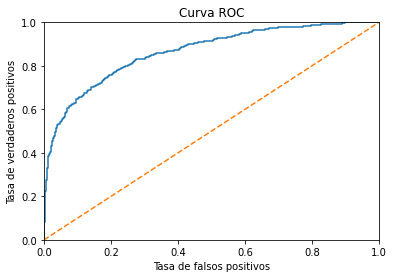

In [109]:
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_valid)
plt.figure()
# Trazamos la gráfica
plt.plot(fpr,tpr)
# Curva ROC para modelo aleatorio
plt.plot([0, 1], [0, 1], linestyle='--')
# Establecemos el límite para los ejes de 0 a 1
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
# Nombramos los ejes "Tasa de falsos positivos" y "Tasa de verdaderos positivos">
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
# Encabezado
plt.title('Curva ROC')
plt.show()

In [110]:
# Roc-score
print('Puntiacion ROC-AUC:',roc_auc_score(target_test,probabilities_one_valid))

Puntiacion ROC-AUC: 0.8645938278396201


### Modelo Logistic Regression

In [111]:
best_log_model_down.fit(features_down, target_down)

LogisticRegression(C=0.5, penalty='l1', random_state=1992, solver='liblinear')

In [112]:
probabilities_valid = best_log_model_down.predict_proba(feat_test)
probabilities_one_valid = probabilities_valid[:,1]

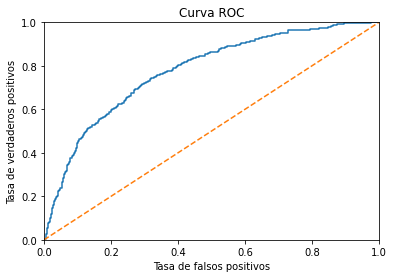

In [113]:
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_valid)
plt.figure()
# Trazamos la gráfica
plt.plot(fpr,tpr)
# Curva ROC para modelo aleatorio
plt.plot([0, 1], [0, 1], linestyle='--')
# Establecemos el límite para los ejes de 0 a 1
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
# Nombramos los ejes "Tasa de falsos positivos" y "Tasa de verdaderos positivos">
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
# Encabezado
plt.title('Curva ROC')
plt.show()

In [114]:
# Roc-score
print(roc_auc_score(target_test,probabilities_one_valid))

0.7770070646698519


## Conclusion

Para llegar a una conclusion preliminar repasemos los pasos realizados:
* Realizamos una exploracion de datos
* Realizamos la separacion de los datos en 3 conjuntos, train, valid y test
* Convertimos las variasles *gender y geography* en One Hot Enconding - OHE para los tres conjuntos
* Rellenamos los valores ausentes con la mediana
* Estandarizamos los datos de los tres conjutnos

Una vez con los 3 conjuntos listos para trabajar, realizamos tres pruebas para encontrar el modelo con el valor mas alto de F1-score (0.59 o más en especifico), nos damos cuenta de un par de cosas: 
* **Con desequilibrio**
1. Obtuvimos un valor F1 conjunto de prueba 0.5314861460957179 para el modelo Tree Forest Classifier 
2. Obtuvimos un valor F1 conjunto de prueba 0.6149253731343284 o 61% en el modelo de random forest classifier con lo que alcanzamos el objetivo.
3. Obtuvimos un valor F1 conjunto de prueba 0.3029197080291971 para el modelo de Logistic Regression siendo el mas bajo.

* **Con sobremuestreo**
1. Obtuvimos un valor F1 conjunto prueba 0.49459783913565425 para el modelo Tree Forest Classifier 
2. Obtuvimos un valor F1 conjnuto prueba 0.6243386243386242 o 62% en el modelo de random forest classifier con lo que alcanzamos el objetivo.
3. Obtuvimos Valor F1 conjunto prueba 0.4939550949913644 para el modelo de Logistic Regression aumentando su puntuacion respecto a los conjuntos con desequilibrio y superando el modelo de Tree Forest Classifier.

* **Con submuestreo**
1. Obtuvimos un valor F1 conjunto prueba 0.5067628494138864 para el modelo Tree Forest Classifier 
2. Obtuvimos un valor F1 onjunto prueba 0.5870178739416745 en el modelo de random forest classifier.
3. Obtuvimos Valor F1 conjunto prueba 0.4978165938864629 para el modelo de Logistic Regression teniendo una puntuacion similar al conjunto con sobremuestreo.

Podemos decir que el **mejor modelo es Random Forest Classifier con Sobremuestreo con una puntuacion de 62% en F1 score** y tenemos dos modelos que cumplen la metrica de 0.59 o 59% que son Random Forest Classifier con desequilibrio con 61% y con sobremuestreo con 62%.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Rafael tu trabajo esta muy bien, se nota comprendiste los conceptos detras de la clasificacion binaria
    
Tu notebook esta muy prolija y documentada, usaste buen codigo y cumpliste muy bien con las consignas
</div>

<div class="alert alert-block alert-danger">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Tenemos unas correcciones que hacer en el feature engineering, te deje mis comentarios en las celdas donde aplicas OHE y Scaling
</div>

<div class="alert alert-block alert-warning">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Ademas te deje una misma sugerencia en las secciones donde entrenas modelos sin balancear y en la que balanceas tambien. Es simplemente un detalle que si tienes tiempo cuando entreges tu devolucion seria bueno sumes
</div>

<div class="alert alert-block alert-success">
<b>Comentario de Revisor - 2da ITERACON</b> <a class="tocSkip"></a>

Felicitaciones, tu proyecto esta aprobado. 
    
Buen trabajo con esas correcciones
</div>